## Übung: Dateien lesen und schreiben (und inzwischen analysieren)

Analysieren Sie bitte die Gewinnung der Zunahme und Abnahme der Onshore- und Offshore-Kapazität pro Jahr

In [ ]:
import pandas as pd

# must install xlrd
df = pd.read_excel('data_windkraftanlagen/Anlagenregister_DK.xls', header=17)
df.head()

In [ ]:
df.info()

In [ ]:
# Data Analysis und Transformation

In [ ]:
df.describe()

In [ ]:
df.loc[df.Kommune.isin(['Lolland'])]

In [ ]:
df.loc[df['X (øst) koordinat \nUTM 32 Euref89'].ipynb_checkpoints/()]

In [ ]:
df[['Kommune', 'Koordinatoprindelse']]

In [ ]:
df.columns

In [ ]:
# must install xlwt
df.to_exce('data_windkraftanlagen/Anlagenregister_DK_analysiert.xls')

In [ ]:
help(pd.read_excel)

## Beispiel: Untershied zwischen tidy und messy daten

Referenz : 
- [1] https://www.jstatsoft.org/article/view/v059i10/
- [2] https://github.com/hadley/r4ds/blob/master/tidy.Rmd



In tidy data [1]:

1.  Each variable forms a column.

2.  Each observation forms a row.

3.  Each type of observational unit forms a table.

In [19]:
df_messy = pd.read_csv('example_messy_data/messy_data.csv')
df_messy.head()

,religion,Less than 30000 USD,30000-49999 USD,50000-99999 USD,100000 USD or more
0,Buddhist,84,42,75,30
1,Catholic,2209,1166,1596,1166
2,Evangelical Protestant,2612,1642,2089,1045
3,Hindu,29,22,58,62
4,Historically Black Protestant,903,375,290,136


In [20]:
# extract the columns
cols = df_messy.columns.to_list()
# fetch the index of the variable
idx_var = cols.pop(0)
# in that case all other columns 
df_tidy = pd.melt(df_messy, id_vars=[idx_var], value_vars=cols)
df_tidy

,religion,variable,value
0,Buddhist,Less than 30000 USD,84
1,Catholic,Less than 30000 USD,2209
2,Evangelical Protestant,Less than 30000 USD,2612
3,Hindu,Less than 30000 USD,29
4,Historically Black Protestant,Less than 30000 USD,903
5,Jehovah's Witness,Less than 30000 USD,100
6,Jewish,Less than 30000 USD,113
7,Mainline Protestant,Less than 30000 USD,1510
8,Mormon,Less than 30000 USD,160
9,Muslim,Less than 30000 USD,70


In [23]:
subset_df = df_tidy.loc[df_tidy.religion == 'Muslim']

In [28]:
subset_df.value.mean()

51.25

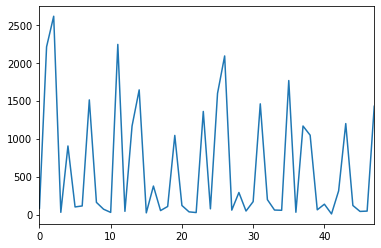

In [31]:
import matplotlib.pyplot as plt
fig =plt.figure()
df_tidy.value.plot()